In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

In [2]:
#Merge Data
city_ride = pd.merge(ride,city, how='left')
#Display Preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
#Extract Urban Cities
urban_df = city_ride[city_ride.iloc[:,5] == 'Urban']
urban_city_group = urban_df.groupby('city')

#Extract Suburban Cities
suburban_df = city_ride[city_ride.iloc[:,5] == 'Suburban']
suburban_city_group = suburban_df.groupby('city')


#Extract Rural Cities
rural_df = city_ride[city_ride.iloc[:,5] == 'Rural']
rural_city_group = rural_df.groupby('city')

In [4]:
#Driver count per Urban city
urban_df2 = urban_df[['city','driver_count']]
urban_df2 = urban_df2.drop_duplicates(keep='first')
print("Urban")
print(urban_df2.head())
print("---------------------------")

#Driver count per Suburban city
suburban_df2 = suburban_df[['city','driver_count']]
suburban_df2 = suburban_df2.drop_duplicates(keep='first')
print("Suburban")
print(suburban_df2.head())
print("---------------------------")

#Driver count per Rural city
rural_df2 = rural_df[['city','driver_count']]
rural_df2 = rural_df2.drop_duplicates(keep='first')
print("Rural")
print(rural_df2.head())

Urban
                 city  driver_count
0  Lake Jonathanshire             5
1  South Michelleport            72
2  Port Samanthamouth            57
3          Rodneyfort            34
4          South Jack            46
---------------------------
Suburban
               city  driver_count
1625  Barronchester            11
1626  East Kentstad            20
1627      Lake Omar            22
1628     Myersshire            19
1629    West Hannah            12
---------------------------
Rural
                 city  driver_count
2250   Randallchester             9
2251      North Holly             8
2252      Michaelberg             6
2253  Lake Latoyabury             2
2255      Taylorhaven             1


In [5]:
#Count number of rides in Urban City
urban_ride_count = urban_city_group.count()
#Total number of rides in Urban city
urban_x = pd.DataFrame(urban_ride_count.iloc[:,0])
print("Urban")
print(urban_x.head())
print("---------------------------")

#Count number of rides in Suburban city
suburban_ride_count = suburban_city_group.count()
#Total number of rides in Suburban city
suburban_x = pd.DataFrame(suburban_ride_count.iloc[:,0])
print("Suburban")
print(suburban_x.head())
print("---------------------------")

#Count number of rides in Rural City
rural_ride_count = rural_city_group.count()
#Total number of rides in Rural City
rural_x = pd.DataFrame(rural_ride_count.iloc[:,0])
print("Rural")
print(rural_x.head())

Urban
                 date
city                 
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
---------------------------
Suburban
               date
city               
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
---------------------------
Rural
                date
city                
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6


In [6]:
#Mean fare in Urban City
urban_mean = pd.DataFrame(urban_city_group.mean())
urban_y = pd.DataFrame(urban_mean.iloc[:,0])
print("Urban")
print(urban_y.head())
print("---------------------------")

#Mean fare in Suburban City
suburban_mean = pd.DataFrame(suburban_city_group.mean())
suburban_y = pd.DataFrame(suburban_mean.iloc[:,0])
print("Suburban")
print(suburban_y.head())
print("---------------------------")

#Mean fare in Rural City
rural_mean = pd.DataFrame(rural_city_group.mean())
rural_y = pd.DataFrame(rural_mean.iloc[:,0])
print("Rural")
print(rural_y.head())

Urban
                      fare
city                      
Amandaburgh      24.641667
Barajasview      25.332273
Carriemouth      28.314444
Christopherfurt  24.501852
Deanville        25.842632
---------------------------
Suburban
                    fare
city                    
Barronchester  36.422500
Bethanyland    32.956111
Brandonfort    35.437368
Colemanland    30.894545
Davidfurt      31.995882
---------------------------
Rural
                     fare
city                     
Bradshawfurt    40.064000
Garzaport       24.123333
Harringtonfort  33.470000
Jessicaport     36.013333
Lake Jamie      34.358333


In [7]:
#Make an Urban df with x and y
urban_points = pd.merge(urban_x, urban_y, on='city')
#Make an Urban df with x and y and size
urban3 = pd.merge(urban_points, urban_df2, on='city')
urban3 = urban3.set_index('city')
urban3 = urban3.rename(columns={'date':"number_of_rides"})
print("Urban")
urban3.head()

Urban


,number_of_rides,fare,driver_count
city,,,
Amandaburgh,18,24.641667,12
Barajasview,22,25.332273,26
Carriemouth,27,28.314444,52
Christopherfurt,27,24.501852,41
Deanville,19,25.842632,49


In [8]:
#Make a Suburban df with x and y
suburban_points = pd.merge(suburban_x, suburban_y, on='city')
#Make a Suburban df with x and y and size
suburban3 = pd.merge(suburban_points, suburban_df2, on='city')
suburban3 = suburban3.set_index('city')
suburban3 = suburban3.rename(columns={'date':"number_of_rides"})
print("Suburban")
suburban3.head()

Suburban


,number_of_rides,fare,driver_count
city,,,
Barronchester,16,36.422500,11
Bethanyland,18,32.956111,22
Brandonfort,19,35.437368,10
Colemanland,22,30.894545,23
Davidfurt,17,31.995882,23


In [9]:
#Make a Rural df with x and y
rural_points = pd.merge(rural_x, rural_y, on='city')
#Make a Rural df with x and y and size
rural3 = pd.merge(rural_points, rural_df2, on='city')
rural3 = rural3.set_index('city')
rural3 = rural3.rename(columns={'date':"number_of_rides"})
print("Rural")
rural3.head()

Rural


,number_of_rides,fare,driver_count
city,,,
Bradshawfurt,10,40.064000,7
Garzaport,3,24.123333,7
Harringtonfort,6,33.470000,4
Jessicaport,6,36.013333,1
Lake Jamie,6,34.358333,4


In [10]:
#Convert Urban data into arrays
urban_s = [i*9 for i in urban3['driver_count']]
urban_x = [i for i in urban3['number_of_rides']]
urban_y = [i for i in urban3['fare']]

#Convert Suburban data into arrays
suburban_s = [i*9 for i in suburban3['driver_count']]
suburban_x = [i for i in suburban3['number_of_rides']]
suburban_y = [i for i in suburban3['fare']]

#Convert Rural data into arrays
rural_s = [i*9 for i in rural3['driver_count']]
rural_x = [i for i in rural3['number_of_rides']]
rural_y = [i for i in rural3['fare']]

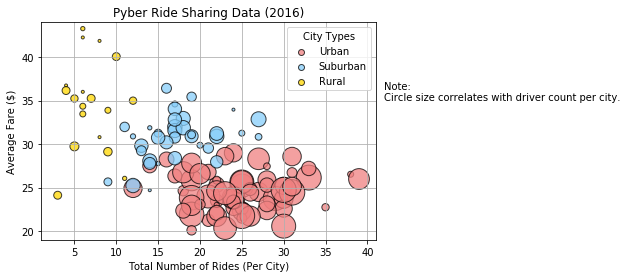

In [21]:
#Legend
plt.scatter([],[],c='lightcoral', marker='o', alpha = 0.75, linewidths=1, edgecolors='black')
plt.scatter([],[],c='lightskyblue', marker='o', alpha = 0.75, linewidths=1, edgecolors='black')
plt.scatter([],[],c='gold', marker='o', alpha = 0.75, linewidths=1, edgecolors='black')
plt.legend(('Urban','Suburban','Rural'),title='City Types')

#Plot points for each city
plt.scatter(x=urban_x, y=urban_y, s=urban_s, c='lightcoral' , marker='o', alpha = 0.75, linewidths=1 , edgecolors='black' )
plt.scatter(x=suburban_x, y=suburban_y, s=suburban_s, c='lightskyblue' , marker='o', alpha = 0.75, linewidths=1 , edgecolors='black' )
plt.scatter(x=rural_x, y=rural_y, s=rural_s, c='gold' , marker='o', alpha = 0.75, linewidths=1 , edgecolors='black' )

#Graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42,35,'Note:\nCircle size correlates with driver count per city.')
plt.grid()
plt.xlim(1, 41)
plt.ylim(19, 44)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Save fig
plt.savefig("Ride_Share_Data_Bubble.png", bbox_inches='tight')

#Show fig
plt.show()

## Total Fares by City Type

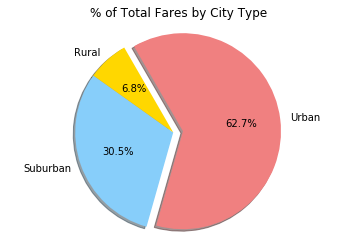

In [12]:
# Calculations
total_fare = city_ride['fare'].sum()
total_urban_fare = urban_df['fare'].sum()
total_suburban_fare = suburban_df['fare'].sum()
total_rural_fare = rural_df['fare'].sum()

urban_fare_percent = total_urban_fare/total_fare
suburban_fare_percent = total_suburban_fare/total_fare
rural_fare_percent = total_rural_fare/total_fare

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"] 
sizes = [total_urban_fare, total_suburban_fare, total_rural_fare]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120, counterclock=False)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("fares_by_city_type_pie.png")

# Show Figure
plt.show()

## Total Rides by City Type

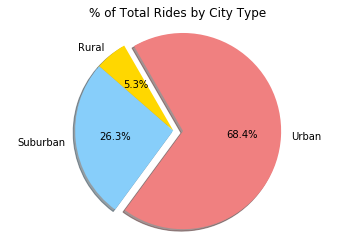

In [13]:
# Calculations
total_rides = city_ride['fare'].count()
total_urban_rides = urban_df['fare'].count()
total_suburban_rides = suburban_df['fare'].count()
total_rural_rides = rural_df['fare'].count()

urban_rides_percent = total_urban_rides/total_rides
suburban_rides_percent = total_suburban_rides/total_rides
rural_rides_percent = total_rural_rides/total_rides

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"] 
sizes = [total_urban_rides, total_suburban_rides, total_rural_rides]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120, counterclock=False)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("rides_by_city_type_pie.png")

# Show Figure
plt.show()

## Total Drivers by City Type

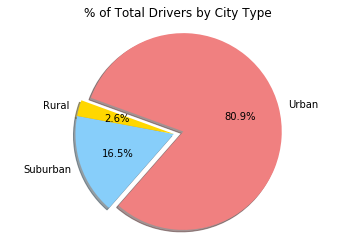

In [14]:
# Calculations
total_driver_count = city_ride['driver_count'].sum()
total_urban_driver_count = urban_df2['driver_count'].sum()
total_suburban_driver_count = suburban_df2['driver_count'].sum()
total_rural_driver_count = rural_df2['driver_count'].sum()

urban_driver_count_percent = total_urban_driver_count/total_driver_count
suburban_driver_count_percent = total_suburban_driver_count/total_driver_count
rural_driver_count_percent = total_rural_driver_count/total_driver_count

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"] 
sizes = [total_urban_driver_count, total_suburban_driver_count, total_rural_driver_count]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160, counterclock=False)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("drivers_by_city_type_pie.png")

# Show Figure
plt.show()

# Pyber Analysis

* Based on the data, Urban city types have the greatest amount of drivers active (80.9%), compared to Suburban (16.5%) and Rural (2.6%).


* The further away from an Urban city type that you are, you will notice greater fares. Looking at the bubble chart, you will notice that Rural fares are, on average, much higher than Urban fares.

* The average max fare in a Rural type is $43.28.

* The average max fare in an Urban type is $28.99.


* Pyber is more likely to be used in a busier city type like Urban, rather than a more countryside type like Rural. The data shows that 68.4% of riders come from Urban city types, while only 5.3% come from a Rural type.